In [113]:
import pandas as pd
import seaborn as sns
import numpy as np

In [55]:
house_data = pd.read_csv('data/kc_house_data_cleaned.csv')
house_data

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,Average,3,1955,0.0,98178
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,Average,3,1951,1991.0,98125
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,Average,2,1933,NaN,98028
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,Very Good,3,1965,0.0,98136
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,Average,4,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,Average,4,2009,0.0,98103
21593,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,Average,4,2014,0.0,98146
21594,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,Average,3,2009,0.0,98144
21595,21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,Average,4,2004,0.0,98027


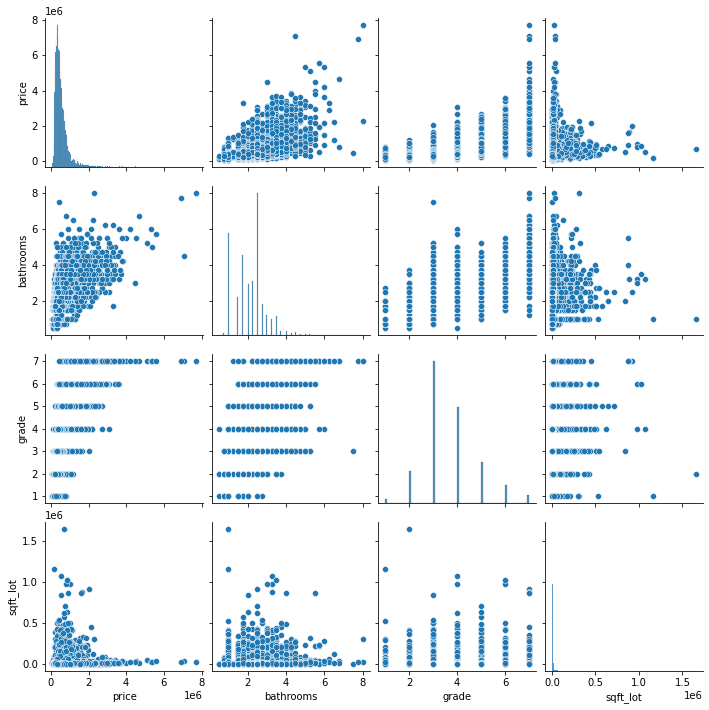

In [56]:
sns.pairplot(house_data[['price','bathrooms','grade','sqft_lot']])

<AxesSubplot:>

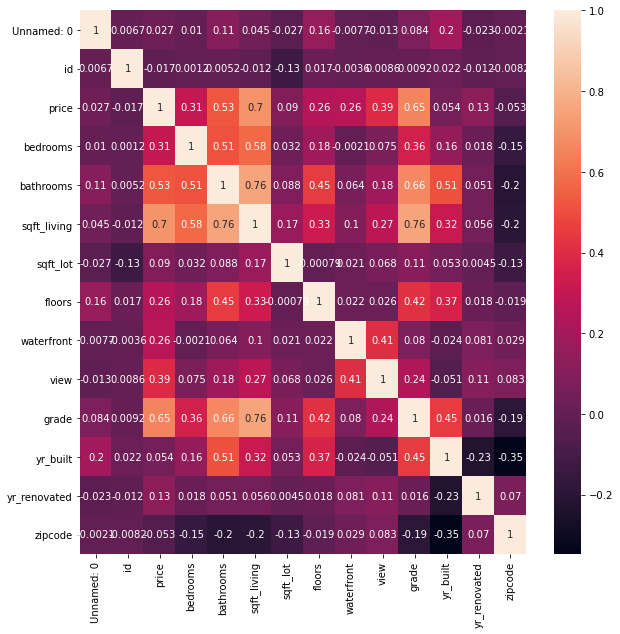

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(),annot=True)

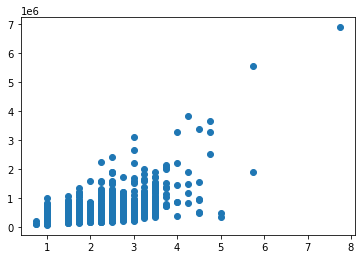

In [58]:
data = house_data.sample(1500)
plt.scatter(x=data['bathrooms'],y=data['price'])

In [76]:
house_data.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [87]:
features = ['bedrooms', 'bathrooms',  'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view','grade']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data[features], house_data['price'], test_size = 0.2)

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [90]:

print(regressor.score(X_train,y_train))
print(regressor.score(X_test, y_test))

0.5905954745720968
0.5886865809639998


In [99]:
from itertools import combinations
sample_list = ['a','b','c']
r_score = []
comb_list = []
for n in range(len(features)):
    n+=1
    feature_list = (list(combinations(features, n)))
    for feature in feature_list:
        X_train, X_test, y_train, y_test = train_test_split(house_data[features], house_data['price'], test_size = 0.2)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r_score.append(regressor.score(X_test,y_test))
        comb_list.append(feature)

In [105]:
max_value = max(r_score)

max_index = r_score.index(max_value)
comb_list[max_index]

('bathrooms', 'sqft_lot', 'view')

In [106]:
max_value

0.6193290301269295

Going to plot multiple distributions of price based off number of bathrooms (mostly for practice but we'll see if there is any useful information!)

In [108]:
house_data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

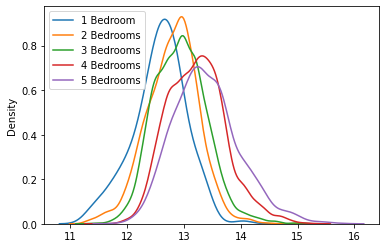

In [124]:
target_0 = house_data.loc[house_data['bedrooms'] == 1]
target_1 = house_data.loc[house_data['bedrooms'] == 2]
target_2 = house_data.loc[house_data['bedrooms'] == 3]
target_3 = house_data.loc[house_data['bedrooms'] == 4]
target_4 = house_data.loc[house_data['bedrooms'] == 5]

sns.distplot(np.log(target_0[['price']]), hist=False, label='1 Bedroom')
sns.distplot(np.log(target_1[['price']]), hist=False, label='2 Bedrooms')
sns.distplot(np.log(target_2[['price']]), hist=False, label='3 Bedrooms')
sns.distplot(np.log(target_3[['price']]), hist=False, label='4 Bedrooms')
sns.distplot(np.log(target_4[['price']]), hist=False, label='5 Bedrooms')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.show()

In [125]:
np.exp(13)

442413.3920089205

24988.45393766571

The mean for conditions is a bit unusual.  The mean price for fair is below poor, I will make a graph to explore that relationship further

In [135]:
house_data.groupby(['condition'])['price'].mean()

condition
Average      542173.057347
Fair         328178.758824
Good         521374.450414
Poor         341067.241379
Very Good    612577.742504
Name: price, dtype: float64

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

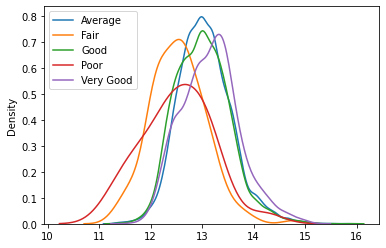

In [133]:
target_0 = house_data.loc[house_data['condition'] == 'Average']
target_1 = house_data.loc[house_data['condition'] == 'Fair']
target_2 = house_data.loc[house_data['condition'] == 'Good']
target_3 = house_data.loc[house_data['condition'] == 'Poor']
target_4 = house_data.loc[house_data['condition'] == 'Very Good']

sns.distplot(np.log(target_0[['price']]), hist=False, label='Average')
sns.distplot(np.log(target_1[['price']]), hist=False, label='Fair')
sns.distplot(np.log(target_2[['price']]), hist=False, label='Good')
sns.distplot(np.log(target_3[['price']]), hist=False, label='Poor')
sns.distplot(np.log(target_4[['price']]), hist=False, label='Very Good')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.show()

In [136]:
house_data.groupby(['condition'])['price'].median()

condition
Average      450250.0
Fair         279000.0
Good         440000.0
Poor         270000.0
Very Good    526000.0
Name: price, dtype: float64

Based off this graph we can see that although the mean price is great for poor over fair, poor contains a larger amount of cheaper houses, which can reflected by the median. Average and Good also seem to be interchangable.